<a href="https://colab.research.google.com/github/Manisha2297/RestroRecommender/blob/main/Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
#mount your own drive to avoid downloading the data multiple time 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
df_business = pd.read_csv('/content/gdrive/MyDrive/YelpDataset/CsvFiles/yelp_academic_dataset_business.csv')

In [43]:
df_business.head(2)

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,NaN,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ


In [44]:
df_business.drop('Unnamed: 0',axis=1,inplace = True)
df_business.categories = df_business.categories.fillna('')

In [45]:
len(All_categories)

2506

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


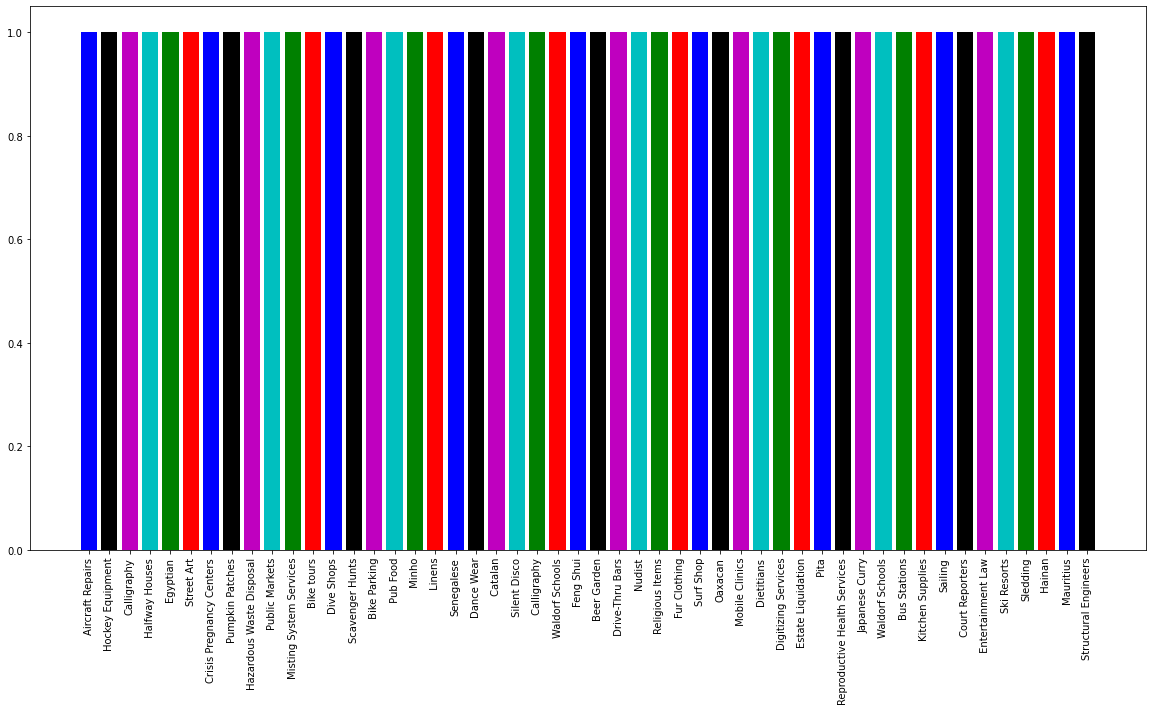

In [46]:
df_open = df_business[df_business.is_open ==1]


Categories = {}

for x in df_open.categories:
   
   all_categories = x.split(',')
   for cat in all_categories:
     if cat not in Categories:
       Categories[cat]=1
     else:
       Categories[cat] +=1

All_categories = list(Categories.keys())    
Cat_list = [[x, Categories[x]] for x in All_categories]

# print(sorted(Cat_list, key = lambda x: x[1], reverse = True))

Cat_list = sorted(Cat_list, key = lambda x: x[1], reverse = True)   

top_50 = Cat_list[-50:]

plt.figure(figsize= (20,10))
plt.bar(range(len(top_50)), [x[1] for x in top_50],align = 'center',color ='bkmcgr' )
plt.xticks(range(len(top_50)), [x[0] for x in top_50], rotation = 'vertical')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


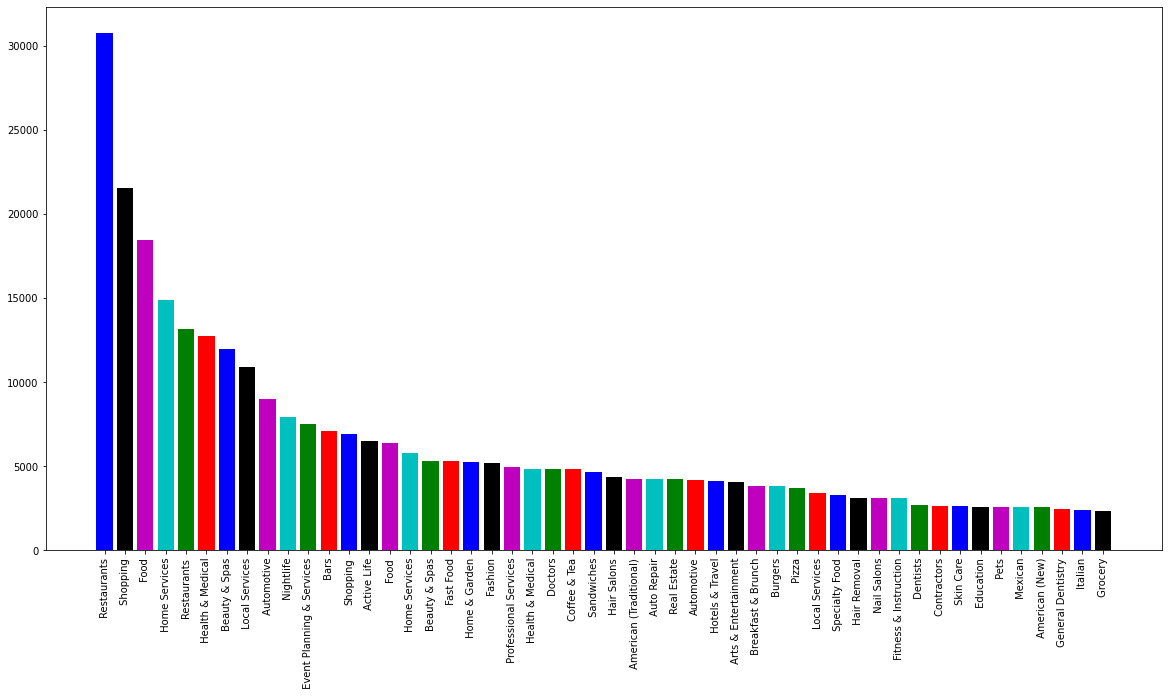

In [47]:
df_open = df_business[df_business.is_open ==1]


Categories = {}

for x in df_open.categories:
   
   all_categories = x.split(',')
   for cat in all_categories:
     if cat not in Categories:
       Categories[cat]=1
     else:
       Categories[cat] +=1

All_categories = list(Categories.keys())    
Cat_list = [[x, Categories[x]] for x in All_categories]

# print(sorted(Cat_list, key = lambda x: x[1], reverse = True))

Cat_list = sorted(Cat_list, key = lambda x: x[1], reverse = True)   

top_50 = Cat_list[:50]

plt.figure(figsize= (20,10))
plt.bar(range(len(top_50)), [x[1] for x in top_50],align = 'center',color ='bkmcgr' )
plt.xticks(range(len(top_50)), [x[0] for x in top_50], rotation = 'vertical')
plt.show();

In [48]:
df_open.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,"Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...",Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC
1,"8880 E Via Linda, Ste 107","{'GoodForKids': 'True', 'ByAppointmentOnly': '...",Yzvjg0SayhoZgCljUJRF9Q,"Health & Medical, Fitness & Instruction, Yoga,...",Scottsdale,NaN,1,33.569404,-111.890264,"Carlos Santo, NMD",85258,4,5.0,AZ


In [49]:
def get_restaurantdf(resturant_keywords, df,restuarant_df):
  for index, row in df.iterrows():
    if any(key_word in row['categories'] for key_word in resturant_keywords):
      restuarant_df= pd.concat([restuarant_df,row])
  return restuarant_df

In [ ]:
# resturant_keywords= ['Restaurants','Food','Fast Food', 'Sandwiches','Burgers', 'Pizza', 'Breakfast & Brunch', 'Speciality Food', 'Mexican','Italian']
# restuarant_df = get_restaurantdf(resturant_keywords, df_open,pd.DataFrame())
# restuarant_df.to_pickle('/content/gdrive/MyDrive/YelpDataset/restuarant_df')

In [58]:
restuarant_df =  pd.read_pickle('/content/gdrive/MyDrive/YelpDataset/restuarant_df')

row_size = int(len(restuarant_df)/14)
restuarant_df = pd.DataFrame(restuarant_df.values.reshape((row_size,14)), columns=df_open.columns)

In [60]:
restuarant_df.shape

(56936, 14)

In [59]:
restuarant_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,404 E Green St,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...",pQeaRpvuhoEqudo3uymHIQ,"Ethnic Food, Food Trucks, Specialty Food, Impo...",Champaign,"{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",1,40.1104,-88.2331,The Empanadas House,61820,5,4.5,IL
1,2831 Parmenter St,"{'BikeParking': 'True', 'Caters': 'True', 'Whe...",M_guz7Dj7hX0evS672wIwA,"Desserts, Food, Ice Cream & Frozen Yogurt",Middleton,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",1,43.1053,-89.5101,Chocolate Shoppe Ice Cream,53562,6,3.5,WI
2,NaN,{'BusinessAcceptsCreditCards': 'True'},mKTq1T_IAplDpHUcMzOXkw,"Hotels & Travel, Transportation, Taxis, Beer, ...",Gastonia,"{'Monday': '0:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,35.2528,-81.1527,Tipsy Ryde,28054,3,3.5,NC
3,"15480 Bayview Avenue, unit D0110","{'RestaurantsTableService': 'False', 'Restaura...",eBEfgOPG7pvFhb2wcG9I7w,"Restaurants, Cheesesteaks, Poutineries",Aurora,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,44.011,-79.4487,Philthy Phillys,L4G 7J1,4,4.5,ON
4,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,"Japanese, Fast Food, Food Court, Restaurants",Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON


In [ ]:
# df_open.drop('Unnamed: 0',axis=1,inplace = True)
df_explode['categories'] = df_open['categories'].apply(lambda x: x.split(','))
df_explode = df_open.explode('categories')
df_explode.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,list_of_categories
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,Active Life,Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC,"[Active Life, Gun/Rifle Ranges, Guns & Ammo,..."
0,10913 Bailey Rd,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...",f9NumwFMBDn751xgFiRbNA,Gun/Rifle Ranges,Cornelius,"{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...",1,35.462724,-80.852612,The Range At Lake Norman,28031,36,3.5,NC,"[Active Life, Gun/Rifle Ranges, Guns & Ammo,..."


In [ ]:
df_food = df_open[df_explode['categories']== 'Restaurants' ]
df_food.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,list_of_categories
24,"15480 Bayview Avenue, unit D0110","{'RestaurantsTableService': 'False', 'Restaura...",eBEfgOPG7pvFhb2wcG9I7w,Restaurants,Aurora,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,44.010962,-79.448677,Philthy Phillys,L4G 7J1,4,4.5,ON,"[Restaurants, Cheesesteaks, Poutineries]"
41,"1541 E 38th St, Ste 101","{'BusinessParking': 'None', 'Ambience': ""{'tou...",98hyK2QEUeI8v2y0AghfZA,Restaurants,Cleveland,"{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",1,41.512155,-81.663332,Pho Lee's Vietnamese Restaurant,44114,23,4.5,OH,"[Restaurants, Vietnamese, Soup]"


In [ ]:
df_business['Restaurants' in df_business['categories']]

KeyError: ignored

In [ ]:
df_food = df_open[(df_open['categories']== 'Restaurants') | (df_open['categories']== 'Food') ]
df_food.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state,list_of_categories
24,"15480 Bayview Avenue, unit D0110","{'RestaurantsTableService': 'False', 'Restaura...",eBEfgOPG7pvFhb2wcG9I7w,Restaurants,Aurora,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,44.010962,-79.448677,Philthy Phillys,L4G 7J1,4,4.5,ON,"[Restaurants, Cheesesteaks, Poutineries]"
31,8130 Boulevard Champlain,"{'BusinessParking': ""{'garage': False, 'street...",pcaQDBM6r0PWTXfYZK6RdA,Food,Lasalle,"{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",1,45.425645,-73.611934,IGA Extra,H8P 1B4,6,3.0,QC,"[Food, Grocery]"


In [ ]:
df_food['business_id'].nunique()

19558

In [ ]:
len(df_food)

19558

In [ ]:
len(All_categories)

2506

In [ ]:
All_categories

['Active Life',
 ' Gun/Rifle Ranges',
 ' Guns & Ammo',
 ' Shopping',
 'Health & Medical',
 ' Fitness & Instruction',
 ' Yoga',
 ' Active Life',
 ' Pilates',
 'Pets',
 ' Pet Services',
 ' Pet Groomers',
 'Home Services',
 ' Plumbing',
 ' Electricians',
 ' Handyman',
 ' Contractors',
 'Auto Repair',
 ' Automotive',
 ' Oil Change Stations',
 ' Transmission Repair',
 'Dry Cleaning & Laundry',
 ' Local Services',
 ' Laundry Services',
 ' Tires',
 'Ethnic Food',
 ' Food Trucks',
 ' Specialty Food',
 ' Imported Food',
 ' Argentine',
 ' Food',
 ' Restaurants',
 ' Empanadas',
 'Martial Arts',
 ' Gyms',
 'Contractors',
 ' Landscaping',
 ' Home Services',
 'Automotive',
 ' Auto Repair',
 'Desserts',
 ' Ice Cream & Frozen Yogurt',
 'Event Planning & Services',
 ' Wedding Planning',
 ' Flowers & Gifts',
 ' Party & Event Planning',
 ' Florists',
 'Auto Customization',
 ' Motorcycle Repair',
 'Weight Loss Centers',
 ' Boot Camps',
 ' Health & Medical',
 ' Trainers',
 ' Interval Training Gyms',
 'Arts

In [ ]:
df_open.categories.unique()

array(['Active Life', ' Gun/Rifle Ranges', ' Guns & Ammo', ..., ' Hainan',
       'Mauritius', 'Structural Engineers'], dtype=object)